# Predicting if income is greater than $50k a year

## Look at the Big picture
The task at hand is to predict whether an individuals annual income is greater than $50k a year.
This is a binary classification problem, which means you have to evaluate the model using precision, recall and f score.
Currently the models performing the best are Xgboost in terms of accuracy (87.224) and Support Vector Classification in terms of precision (88.032).


## Get the data
The data is available from the ucimlrepo, so we will load it in here

In [4]:
#import libraries
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
data = adult.data.features 
targets = adult.data.targets 
  
# metadata 
#print(adult.metadata) 
  
# variable information 
print(adult.variables) 
print(f"There are {len(data)} datapoints in the set")

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

Then we have to split the data into a training and a test set. We do this as early as possible to avoid snooping bias. We use Sickit-Learns split function to do so. We split the data with 80% for training and 20% for test. As this is not the largest dataset, with only 48842 datapoints. We therefore need enough datapoints for testing in the end to make sure the model is generalizable. We set a random_State to make sure the data is split the same every time the code is run.

In [6]:
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2, random_state=42)


## Explore and Visualize the data
Now that we have split the dataset, we can start to explore and visualize the data, to gain a better understanding of it.
To do this, first we will copy the data, so we can always go back to the original data
Then we will look at the different attributes of the data

In [7]:
train_data_copy, train_targets_copy = train_data.copy(), train_targets.copy()
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39073 entries, 37193 to 15795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39073 non-null  int64 
 1   workclass       38301 non-null  object
 2   fnlwgt          39073 non-null  int64 
 3   education       39073 non-null  object
 4   education-num   39073 non-null  int64 
 5   marital-status  39073 non-null  object
 6   occupation      38299 non-null  object
 7   relationship    39073 non-null  object
 8   race            39073 non-null  object
 9   sex             39073 non-null  object
 10  capital-gain    39073 non-null  int64 
 11  capital-loss    39073 non-null  int64 
 12  hours-per-week  39073 non-null  int64 
 13  native-country  38861 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.5+ MB


We have 8 features which are of object type, and 6 features which are of int64 type.
To further explore this, look at the top 5 rows of the dataset.

In [8]:
train_data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
37193,32,Private,50753,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
31093,45,State-gov,144351,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
33814,35,Local-gov,252217,12th,8,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
14500,64,Private,69525,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,20,United-States
23399,63,Self-emp-not-inc,28612,HS-grad,9,Widowed,Sales,Not-in-family,White,Male,0,0,70,United-States


Here we see that workclass, education, education-num (we know this from documentation), marital-status, occupation, relationship, race, sex (binary), and native-country are categorical data. Therefore we want to explore which categories there are, and how many are in each category.

In [9]:
def printValueCounts(data,category):
    print(data[category].value_counts())
printValueCounts(train_data_copy,"workclass")
printValueCounts(train_data_copy,"education")
printValueCounts(train_data_copy,"education-num")
printValueCounts(train_data_copy,"marital-status")
printValueCounts(train_data_copy,"occupation")
printValueCounts(train_data_copy,"relationship")
printValueCounts(train_data_copy,"race")
printValueCounts(train_data_copy,"sex")
printValueCounts(train_data_copy,"native-country")

workclass
Private             27177
Self-emp-not-inc     3034
Local-gov            2509
State-gov            1595
?                    1450
Self-emp-inc         1378
Federal-gov          1132
Without-pay            17
Never-worked            9
Name: count, dtype: int64
education
HS-grad         12661
Some-college     8695
Bachelors        6421
Masters          2144
Assoc-voc        1628
11th             1440
Assoc-acdm       1269
10th             1156
7th-8th           739
Prof-school       652
9th               609
12th              527
Doctorate         473
5th-6th           406
1st-4th           189
Preschool          64
Name: count, dtype: int64
education-num
9     12661
10     8695
13     6421
14     2144
11     1628
7      1440
12     1269
6      1156
4       739
15      652
5       609
8       527
16      473
3       406
2       189
1        64
Name: count, dtype: int64
marital-status
Married-civ-spouse       17909
Never-married            12914
Divorced                  5297
Se

We also want to look at the other fields.

In [10]:
train_data_copy.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,39073.000000,3.907300e+04,39073.000000,39073.000000,39073.000000,39073.000000
mean,38.632662,1.900070e+05,10.077675,1091.418038,87.276610,40.400788
std,13.737816,1.058195e+05,2.565268,7500.039346,402.816969,12.393669
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782720e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.382460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We can also display the data as histograms.

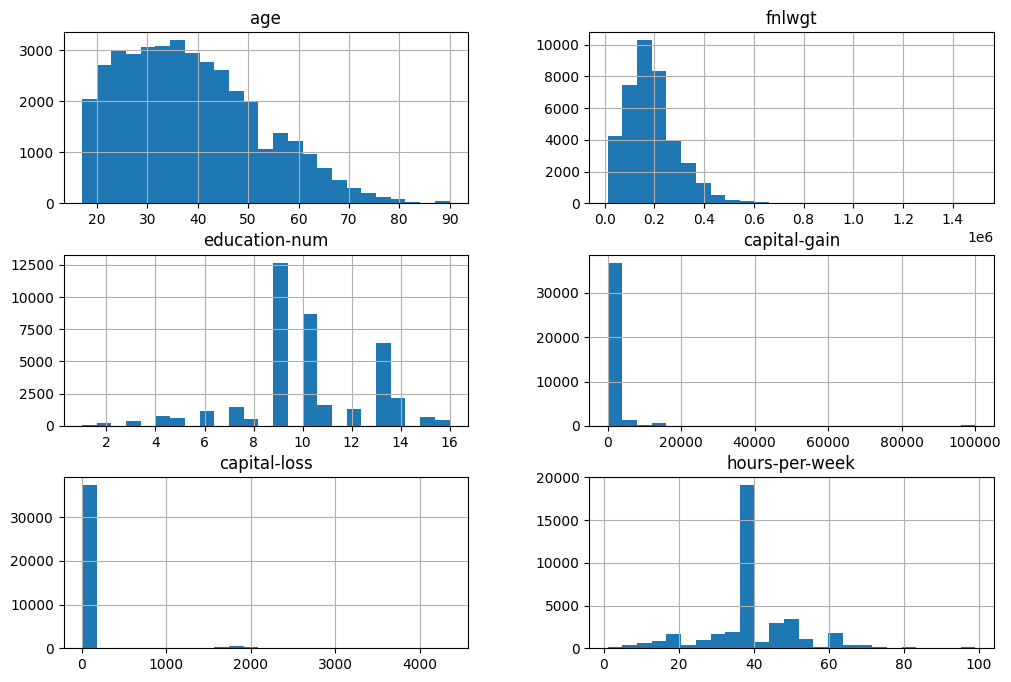

In [12]:
train_data_copy.hist(bins=25, figsize=(12,8))
plt.show()

As we can see, most of these are fairly well distributed but the fnlwgt, the capital-loss, and the capital-gain, which both features some outliers. We will tackle this later, and see if a standardization might help on the distribution of the fnlwgt.
Now it is time to try to explore how the different attributes relates to one another, and how the different attributes relate to the target.
We will do this by scatter-plotting the features and colouring the two classes, to see if any clusters appear.

## Prepare the data for machine Learning Algorithms

## Select and Train a model

## Fine-Tune the model